# Classificação com Adult set


## Importando Pacotes e settings

In [1]:
import pandas as pd
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6)

## Coletando as bases de dados de treino e teste

In [2]:
adult_train = pd.read_csv("/kaggle/input/adult-pmr3508/train_data.csv", na_values='?', index_col= 0)
adult_test = pd.read_csv("/kaggle/input/adult-pmr3508/test_data.csv", na_values='?', index_col= 0)

## Visualizando algumas informações do Dataset

In [3]:
#Mostra o formato da base de dados
adult_train.shape

(32560, 15)

In [4]:
#Mostra algumas informações das features
adult_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32560 entries, 16280 to 48839
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       30724 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education.num   32560 non-null  int64 
 5   marital.status  32560 non-null  object
 6   occupation      30717 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital.gain    32560 non-null  int64 
 11  capital.loss    32560 non-null  int64 
 12  hours.per.week  32560 non-null  int64 
 13  native.country  31977 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [5]:
adult_test.shape

(16280, 14)

In [6]:
#Mostra o início da base de dados
adult_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
Id,,,,,,,,,,,,,,,
16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


In [7]:
adult_test.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
Id,,,,,,,,,,,,,,
16275,40,Private,168113,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
16276,30,Local-gov,327203,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States
16277,25,Private,116358,HS-grad,9,Never-married,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0,0,40,Philippines
16278,60,Private,39263,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,3325,0,35,United-States
16279,49,Private,182862,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,7688,0,40,United-States


In [8]:
#Mostra o final da base de dados
adult_train.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
Id,,,,,,,,,,,,,,,
48835,42,Private,384236,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,40,United-States,>50K
48836,23,Private,129042,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Black,Female,0,0,40,United-States,<=50K
48837,30,Private,195488,HS-grad,9,Never-married,Priv-house-serv,Own-child,White,Female,0,0,40,Guatemala,<=50K
48838,18,Private,27620,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,25,United-States,<=50K
48839,47,Local-gov,203067,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States,<=50K


In [9]:
# Mudando a feature income para melhor tratamento
# <=50k = 0, >50k = 1


adult_train ["income"] = np.where(adult_train["income"] == "<=50K", 0, 1)

In [10]:
#Verificando a mudança
adult_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
Id,,,,,,,,,,,,,,,
16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,0
16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,0
16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0
16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,1


## Verificação de dados faltantes

In [11]:
adult_train.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [12]:
adult_test.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation        966
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    274
dtype: int64

Retirando dados faltantes

## Análise exploratória dos dados

Gráfico de correlação para analisar a relação entre as features

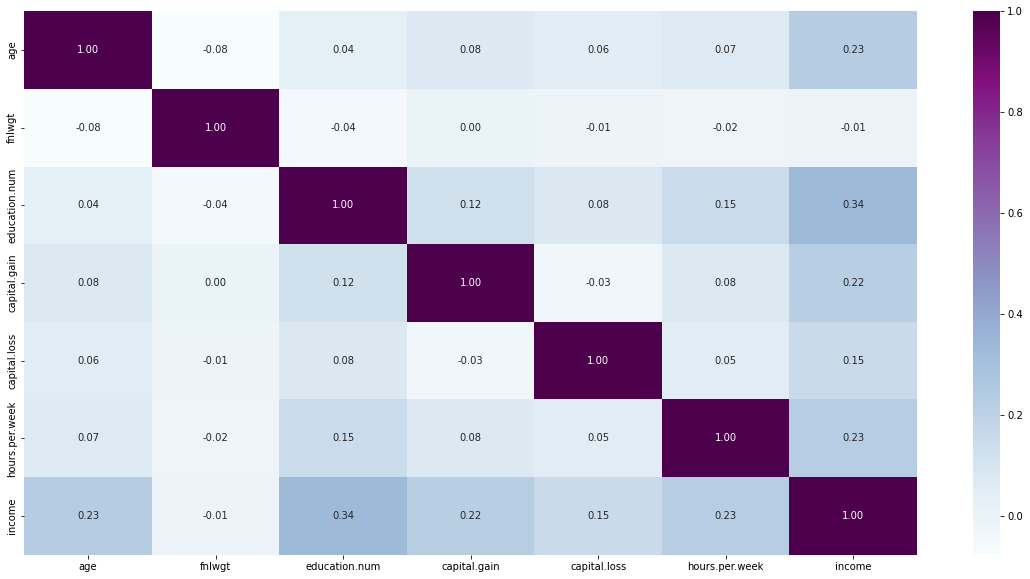

In [13]:
plt.figure(figsize = (20,10))
sns.heatmap(adult_train.corr(), cmap='BuPu', annot = True, fmt = '.2f')
plt.show()

Nota-se que a coluna "fnlwgt" não possui uma relação boa com income, dentre as variáveis numéricas, portanto, ela será retirada

In [14]:
# Retirando a coluna
adult_train.drop('fnlwgt', axis = 1, inplace = True)

In [15]:
# Verificando a mudança
adult_train.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
Id,,,,,,,,,,,,,,
16280,34,Private,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,0
16281,58,Local-gov,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
16282,25,Private,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,0
16283,24,Private,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0
16284,57,Self-emp-inc,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,1


In [16]:
adult_test.drop('fnlwgt', axis = 1, inplace = True)

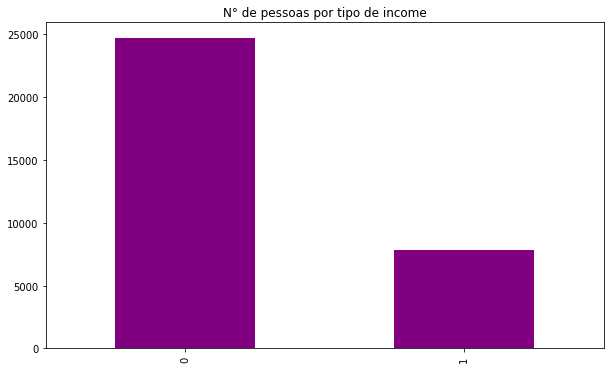

In [17]:
# Verifica o número de pessoas que possuem cada tipo de income
_ = adult_train["income"].value_counts().plot(kind = "bar", color = "purple")
_ = plt.title("N° de pessoas por tipo de income")

### Analisando relações entre algumas variáveis e o income

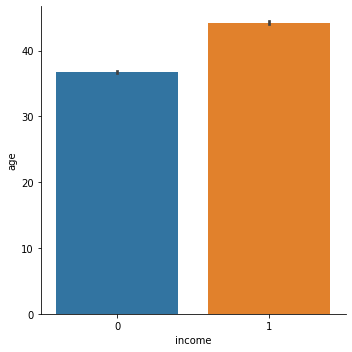

In [18]:
sns.catplot(y="age", x="income", kind="bar", data= adult_train);

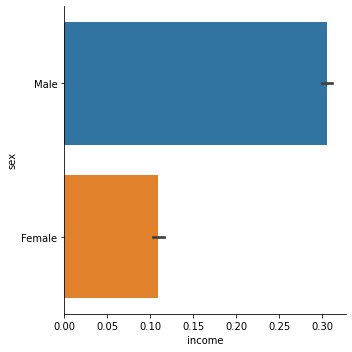

In [19]:
sns.catplot(y="sex", x="income", kind="bar", data= adult_train);

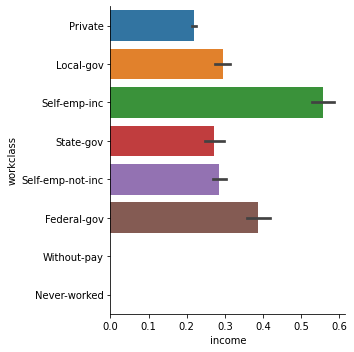

In [20]:
sns.catplot(y="workclass", x="income", kind="bar", data= adult_train);

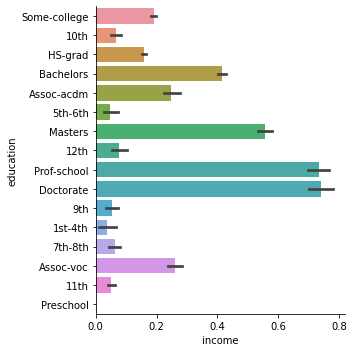

In [21]:
sns.catplot(y="education", x="income", kind="bar", data= adult_train);

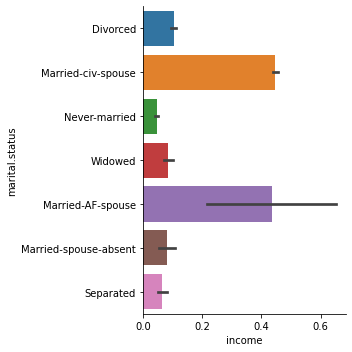

In [22]:
sns.catplot(y="marital.status", x="income", kind="bar", data= adult_train);

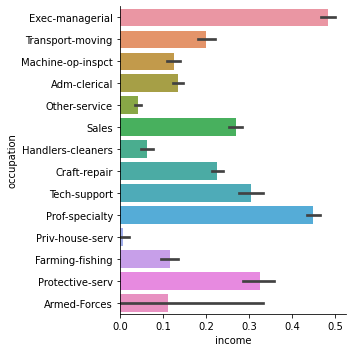

In [23]:
sns.catplot(y="occupation", x="income", kind="bar", data= adult_train);

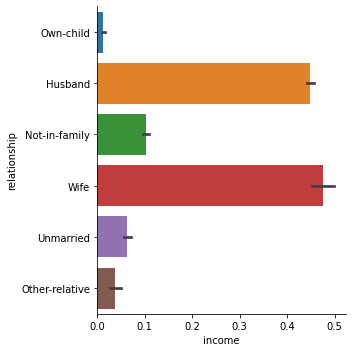

In [24]:
sns.catplot(y="relationship", x="income", kind="bar", data= adult_train);

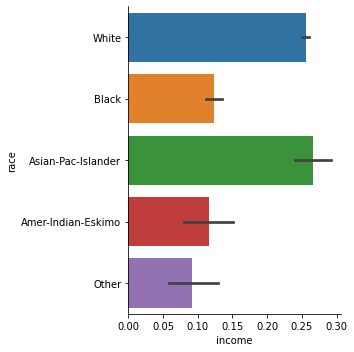

In [25]:
sns.catplot(y="race", x="income", kind="bar", data= adult_train);

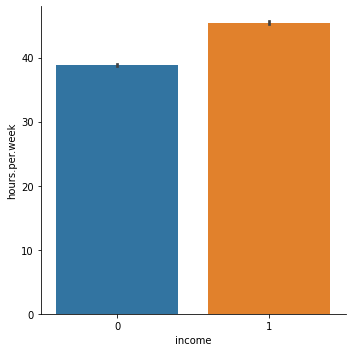

In [26]:
sns.catplot(y="hours.per.week", x="income", kind="bar", data= adult_train);

Tratando dados faltantes

In [27]:
nadult_train = adult_train.fillna("0")
nadult_test = adult_test.fillna("0")

In [28]:
# Verificando a mudança
nadult_train.isnull().sum()

age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

## Classificador

Seleção de atributos

Transformando dados não numéricos para numéricos

In [29]:
numadult_train = nadult_train.apply(preprocessing.LabelEncoder().fit_transform)
numadult_test = nadult_test.apply(preprocessing.LabelEncoder().fit_transform)

In [30]:
Xadult_train = numadult_train[["age","workclass","education.num","marital.status","occupation", "relationship", "race", "sex", "capital.gain","capital.loss","hours.per.week"]]
Yadult_train = numadult_train.income

In [31]:
Xadult_test = numadult_test[["age","workclass","education.num","marital.status","occupation", "relationship", "race", "sex", "capital.gain","capital.loss","hours.per.week"]]

In [32]:
Xadult_train.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week
Id,,,,,,,,,,,
16280,17,4,9,0,4,3,4,1,0,0,43
16281,41,2,5,2,14,0,4,1,0,0,39
16282,8,4,9,4,7,1,4,1,0,0,41
16283,7,4,9,0,1,1,4,0,0,0,39
16284,40,5,8,2,14,0,4,1,79,0,59


Fazendo o mesmo com os dados de teste

In [33]:
maior_acc = 0
maior_k = 0
for k in range (15, 31):
    knn = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn, Xadult_train, Yadult_train, cv=10, scoring = 'accuracy').mean()
    print(f"k = {k}, acc = {score}")
    if score > maior_acc:
        maior_k = k
        maior_acc = score

print("Melhor K = " + str(maior_k) + " e acurácia = " + str(maior_acc))

k = 15, acc = 0.8364864864864865
k = 16, acc = 0.8375
k = 17, acc = 0.8361486486486486
k = 18, acc = 0.8364557739557739
k = 19, acc = 0.8363636363636363
k = 20, acc = 0.8379606879606879
k = 21, acc = 0.8375
k = 22, acc = 0.8384213759213759
k = 23, acc = 0.8379914004914004
k = 24, acc = 0.8395577395577396
k = 25, acc = 0.8382063882063882
k = 26, acc = 0.8385749385749385
k = 27, acc = 0.837438574938575
k = 28, acc = 0.8378992628992629
k = 29, acc = 0.8379299754299755
k = 30, acc = 0.8385442260442261
Melhor K = 24 e acurácia = 0.8395577395577396


In [34]:
knn = KNeighborsClassifier(n_neighbors = maior_k)

In [35]:
knn.fit(Xadult_train, Yadult_train)

KNeighborsClassifier(n_neighbors=24)

In [36]:
Xadult_train.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week
Id,,,,,,,,,,,
16280,17,4,9,0,4,3,4,1,0,0,43
16281,41,2,5,2,14,0,4,1,0,0,39
16282,8,4,9,4,7,1,4,1,0,0,41
16283,7,4,9,0,1,1,4,0,0,0,39
16284,40,5,8,2,14,0,4,1,79,0,59


In [37]:
Xadult_test.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week
Id,,,,,,,,,,,
0,8,4,12,4,10,1,4,1,0,0,43
1,47,7,12,2,4,0,4,1,0,0,44
2,14,4,13,0,4,1,4,0,0,0,39
3,28,4,8,4,7,3,4,1,0,0,39
4,47,5,12,2,4,0,4,1,0,0,49


In [38]:
Xadult_test.tail()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week
Id,,,,,,,,,,,
16275,23,4,8,2,3,0,4,1,0,0,39
16276,13,2,8,2,8,0,4,1,0,0,39
16277,8,4,8,4,1,3,1,1,0,0,39
16278,43,4,13,4,4,1,4,0,49,0,34
16279,32,4,9,2,3,0,4,1,90,0,39


Prevendo os valores do income da base de teste

In [39]:
YPrediction = knn.predict(Xadult_test)
YPrediction

array([0, 0, 0, ..., 0, 0, 1])

Ajustando o dataframe

In [40]:
incomes = []
for income in YPrediction:
    if income == 0:
        incomes.append('<=50K')
    else:
        incomes.append('>50K')

Adultsubmission = pd.DataFrame()
Adultsubmission[0] = Xadult_test.index
Adultsubmission[1] = incomes
Adultsubmission.columns = ['Id', 'income']
Adultsubmission.head()

,Id,income
0,0,<=50K
1,1,<=50K
2,2,<=50K
3,3,<=50K
4,4,<=50K


In [41]:
Adultsubmission.tail()

,Id,income
16275,16275,<=50K
16276,16276,<=50K
16277,16277,<=50K
16278,16278,<=50K
16279,16279,>50K


In [42]:
# Salvando o csv
Adultsubmission.to_csv('adultsubmission.csv', index = False)